<a href="https://colab.research.google.com/github/HariniDundi/Machine_learning-Projects/blob/main/ML_workshop_module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**single layer perceptron designing code**

In [232]:
import numpy as np

In [233]:
#sample data points with labels
X=np.array([[1,2],[0,0],[-1,-1],[-2,-3]])
Y=np.array([1,0,1,0])

In [234]:
learning_rate=0.1


In [235]:
w=np.random.rand(2)

In [236]:
threshold=0

In [237]:
for epoch in range(100):
  for i in range(len(X)):
    z=np.dot(X[i],w)+threshold #this z is weighted sum
    y=1 if z>0 else 0
    error=Y[i]-y
    w[0]-=learning_rate*error*X[i][0]
    w[1]-=learning_rate*error*X[i][1]
print("Final weights:",w)


Final weights: [10.95967201 10.5120083 ]


In [238]:
new_point=np.array([3,1]) #here if we give values greater than 0 then we get output as 1 if we give the values in negatives then we get output as 0
z=np.dot(new_point,w)+threshold
y=1 if z>0 else 0
print("prediction for new point:",y)

prediction for new point: 1


In [239]:
new_point=np.array([-2,1]) #here if we give values greater than 0 then we get output as 1 if we give the values in negatives then we get output as 0
z=np.dot(new_point,w)+threshold
y=1 if z>0 else 0
print("prediction for new point:",y)

prediction for new point: 0


**multilayer_perception  designing code**

In [240]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers # we imported keras for creating a neural network

In [241]:
data=load_wine()

In [242]:
#data = pd.DataFrame(data.data, columns=data.feature_names)
#print(data.head())

In [243]:
X,Y = data.data, data.target
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42) #training set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #validation set

In [244]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [245]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [246]:
# Defining the model architecture
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_dim=X.shape[1]),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation="relu"),                        # Another hidden layer with 32 neurons and ReLU activation
    layers.Dense(3, activation="softmax")                       # Output layer with softmax activation for multiclass classification
])

In [247]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) #Adam is an optimization algorithm that adapts the learning rate during training
#metrics is nothing but accuracy

In [248]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4/4 [==============================] - 1s 68ms/step - loss: 1.0681 - accuracy: 0.5242 - val_loss: 0.9686 - val_accuracy: 0.6296
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.9290 - accuracy: 0.6210 - val_loss: 0.8585 - val_accuracy: 0.6296
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 0.8150 - accuracy: 0.6694 - val_loss: 0.7663 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.7202 - accuracy: 0.7097 - val_loss: 0.6838 - val_accuracy: 0.7778
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6377 - accuracy: 0.8226 - val_loss: 0.6104 - val_accuracy: 0.8148
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.5666 - accuracy: 0.8710 - val_loss: 0.5451 - val_accuracy: 0.8889
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 0.5022 - accuracy: 0.9113 - val_loss: 0.4874 - val_accuracy: 0.9259
Epoch 8/10
4/4 [===========

In [249]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

1/1 [==============================] - 0s 27ms/step - loss: 0.3002 - accuracy: 0.9630
Test accuracy: 0.963


#the test accuracy will always be one that means that the training is properly done

In [250]:
# Make predictions on new data
X_new = np.array([
    [13.71, 1.86, 2.36, 16.6, 101.2, 2.61, 2.88, 0.27, 1.69, 3.8, 1.11, 4.0, 1035],
    [13.56, 1.73, 2.46, 20.5, 116.0, 2.96, 2.78, 0.2, 2.45, 6.25, 0.98, 3.03, 1120]
])
predictions = model.predict(X_new)
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {pred}")

1/1 [==============================] - 0s 73ms/step
Predictions:
Sample 1: [1. 0. 0.]
Sample 2: [1. 0. 0.]


In [251]:
import numpy as np
import pandas as pd

In [252]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [253]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [254]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [255]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [256]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [257]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [258]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [259]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [260]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [262]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [263]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [264]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 11)                132       
                                                                 
 dense_37 (Dense)            (None, 11)                132       
                                                                 
 dense_38 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [265]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [266]:
history=model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5061 - accuracy: 0.7958 - val_loss: 0.5031 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7958 - val_loss: 0.5019 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7958 - val_loss: 0.5012 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7958 - val_loss: 0.5014 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7958 - val_loss: 0.5009 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7958 - val_loss: 0.5006 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7958 - val_loss: 0.5006 - val_accuracy: 0.7969

In [267]:
y_pred =model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [268]:
y_pred

array([[0.16310105],
       [0.23921278],
       [0.23478346],
       ...,
       [0.23478346],
       [0.24241269],
       [0.16310105]], dtype=float32)

In [269]:
y_pred = y_pred.argmax(axis=-1)

In [270]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

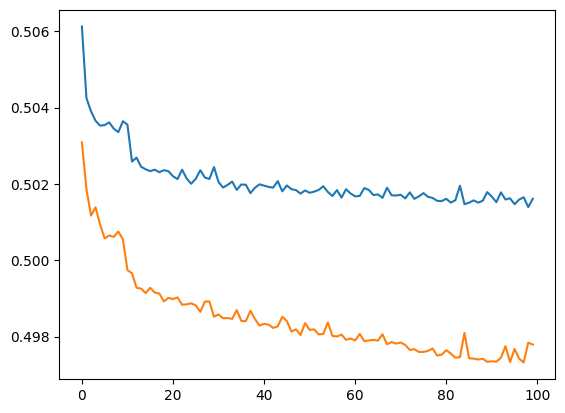

In [271]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

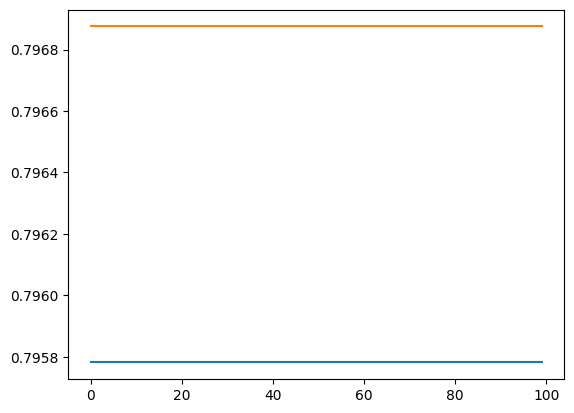

In [272]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Face Mask detection using CNN**

In [273]:
!pip install kaggle

In [274]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [275]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:06<00:00, 31.8MB/s]
100% 163M/163M [00:06<00:00, 27.7MB/s]


In [276]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [277]:
!ls

 Churn_Modelling.csv   face-mask-dataset.zip  'guy without mask.jpg'   sample_data
 data		      'guy with mask.jpg'      kaggle.json


In [278]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [280]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1542.jpg', 'with_mask_1755.jpg', 'with_mask_1294.jpg', 'with_mask_3682.jpg', 'with_mask_3326.jpg']
['with_mask_2358.jpg', 'with_mask_3084.jpg', 'with_mask_1503.jpg', 'with_mask_1884.jpg', 'with_mask_826.jpg']


In [281]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2278.jpg', 'without_mask_617.jpg', 'without_mask_499.jpg', 'without_mask_869.jpg', 'without_mask_1012.jpg']
['without_mask_1348.jpg', 'without_mask_3375.jpg', 'without_mask_2401.jpg', 'without_mask_78.jpg', 'without_mask_2058.jpg']


In [282]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [283]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [284]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [285]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


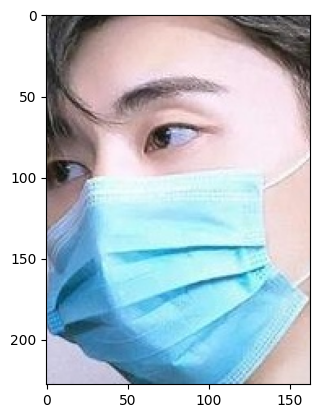

In [293]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

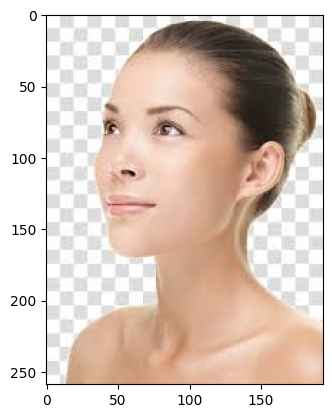

In [294]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the Images

Convert the images to numpy arrays



In [295]:
with_mask_path = '/content/data/with_mask/'

data = []

# Iterate over all image files in the with_mask directory
for img_file in with_mask_files:
  # Open the image file
  image = Image.open(with_mask_path + img_file)
  # Resize the image to 128x128
  image = image.resize((128,128))
  # Convert the image to RGB format
  image = image.convert('RGB')
  # Convert the image to a NumPy array
  image = np.array(image)
  # Append the NumPy array to the data list
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
# Iterate over all image files in the without_mask directory
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [296]:
type(data)

list

In [297]:
len(data)

7553

array([[[ 68,  60,  58],
        [ 72,  64,  62],
        [ 82,  74,  72],
        ...,
        [ 19,  20,  22],
        [ 21,  22,  24],
        [ 21,  22,  24]],

       [[ 70,  62,  60],
        [ 76,  68,  66],
        [ 90,  82,  80],
        ...,
        [ 19,  20,  22],
        [ 22,  23,  25],
        [ 22,  23,  25]],

       [[ 81,  73,  71],
        [ 82,  74,  72],
        [ 85,  77,  75],
        ...,
        [ 18,  19,  21],
        [ 21,  22,  24],
        [ 21,  22,  24]],

       ...,

       [[ 38,  22,   6],
        [122, 105,  87],
        [222, 201, 178],
        ...,
        [209, 242, 255],
        [202, 234, 252],
        [205, 237, 253]],

       [[ 41,  25,   9],
        [123, 106,  89],
        [221, 199, 177],
        ...,
        [207, 240, 255],
        [205, 236, 253],
        [203, 235, 250]],

       [[ 39,  23,   7],
        [121, 104,  87],
        [216, 195, 173],
        ...,
        [200, 233, 250],
        [207, 238, 255],
        [201, 233, 248]]], dtype=uint8)
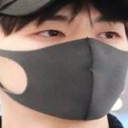

In [299]:
data[0]

In [300]:
type(data[0])

numpy.ndarray

In [301]:
data[0].shape

(128, 128, 3)

In [302]:
X = np.array(data)
Y = np.array(labels)

In [303]:
type(X)

numpy.ndarray

In [304]:
type(Y)

numpy.ndarray

In [305]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [306]:
print(Y)

[1 1 1 ... 0 0 0]


In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [308]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [309]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [141, 142, 144],
        [142, 142, 144],
        [142, 142, 144]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [145, 145, 147],
        [144, 144, 146],
        [144, 144, 146]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [144, 145, 146],
        [145, 145, 147],
        [145, 145, 147]]], dtype=uint8)
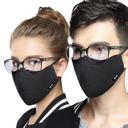

In [310]:
X_train[0]

In [311]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [312]:
import tensorflow as tf
from tensorflow import keras

In [313]:
num_of_classes = 2

model = keras.Sequential()

# First convolutional block
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [314]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [315]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 148s 858ms/step - loss: 0.5084 - acc: 0.7683 - val_loss: 0.3620 - val_acc: 0.8430
Epoch 2/5
170/170 [==============================] - 128s 753ms/step - loss: 0.2974 - acc: 0.8812 - val_loss: 0.2407 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 127s 747ms/step - loss: 0.2499 - acc: 0.9016 - val_loss: 0.3214 - val_acc: 0.8711
Epoch 4/5
170/170 [==============================] - 127s 750ms/step - loss: 0.2061 - acc: 0.9216 - val_loss: 0.2559 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 133s 783ms/step - loss: 0.1719 - acc: 0.9318 - val_loss: 0.2407 - val_acc: 0.9223


In [316]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 209ms/step - loss: 0.1759 - acc: 0.9312
Test Accuracy = 0.9311714172363281


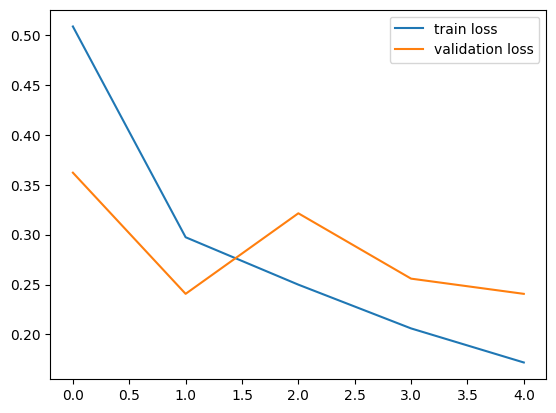

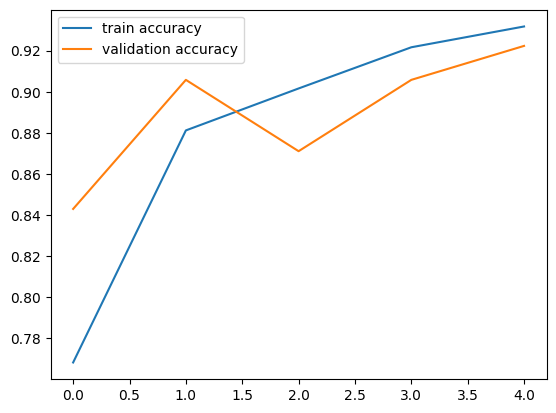

In [317]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/guy without mask.jpg


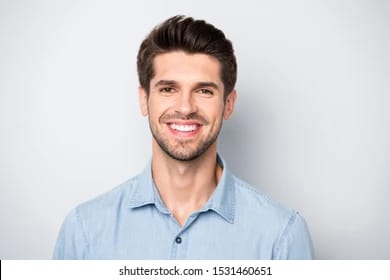

1/1 [==============================] - 0s 36ms/step
[[0.4176158 0.4776051]]
1
The person in the image is wearing a mask


In [320]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/guy without mask.jpg


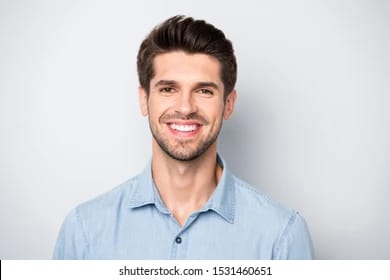

1/1 [==============================] - 0s 33ms/step
[[0.4176158 0.4776051]]
1
The person in the image is wearing a mask


In [319]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')